In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
#Sepal.Length（がく片の長さ），Sepal.Width（がく片の幅）， Petal.Length（花弁の長さ）
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=0)

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9809523809523809
0.9777777777777777


In [ ]:
export_graphviz(dtc, out_file="cancer_tree_prepruning.dot", class_names=["Iris-Setosa", "Iris-Versicolour", "Iris-Virginica"], feature_names=iris.feature_names, impurity=False, filled=True)

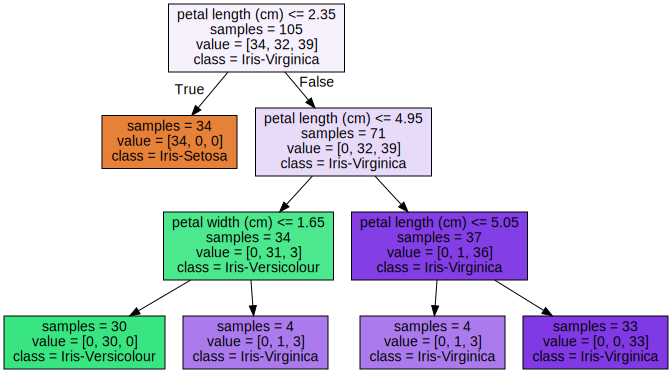

In [ ]:
with open("cancer_tree_prepruning.dot") as f:
  dot_graph_prepruning = f.read()
graphviz.Source(dot_graph_prepruning)

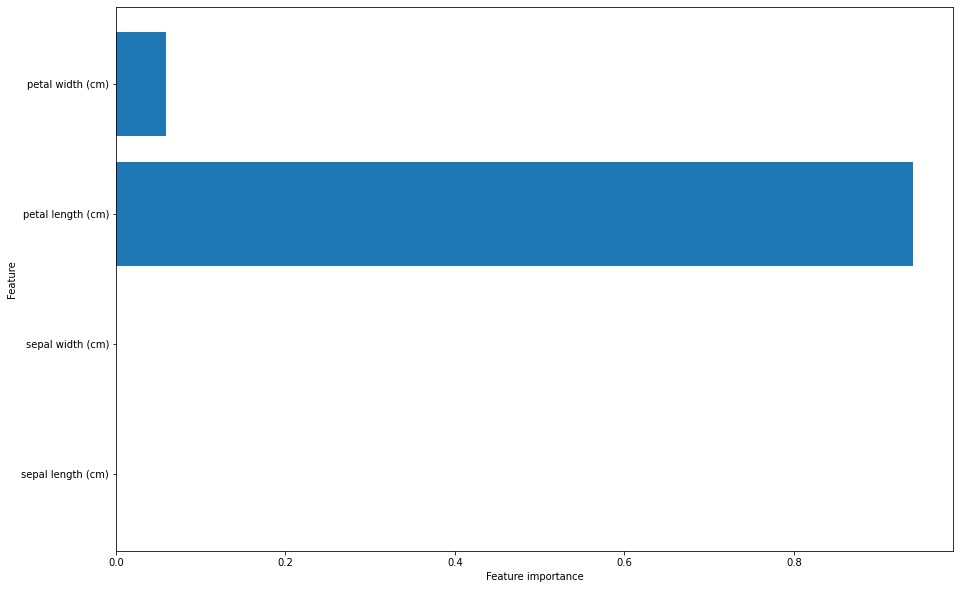

In [ ]:
def plot_feature_importances_iris(model):
  n_features = iris.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), iris.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_iris(dtc)